In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
grayImage = r'D:\py\python\Computer Vision\Image\albert-einstein_gray.jpg';
colourImage = r'D:\py\python\Computer Vision\Image\tulips.jpg';
I_gray = cv2.imread(grayImage, cv2.IMREAD_GRAYSCALE);
I_BGR = cv2.imread(colourImage);
numRows = I_gray.shape[0];
numCols = I_gray.shape[1];

In [17]:
import matplotlib as mpl
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi'];
    H, W = I.shape[0:2];
    figSize = W/float(dpi), H/float(dpi);
    fig = plt.figure(figsize = figSize);
    ax = fig.add_axes([0, 0, 1, 1]);
    ax.axis('off');
    ax.imshow(I, cmap='gray');
    plt.show;

In [4]:
def f_bilinearInterpolate(r, c, I):

    # 取得左邊的 x 座標
    lc = int(c);

    # 取得右邊邊的 x 座標
    rc = lc + 1;

    # 計算右邊的權重
    wr = c - lc;

    # 計算左邊的權重
    wl = rc - c;

    # 取得上面的 y 座標
    tr = int(r);

    # 取得下面的 y 座標
    br = tr + 1;

    # 計算上面的權重
    wt = br - r;

    # 計算下面的權重
    wb = r - tr;

    # 判斷是否超出圖像邊界
    if tr >= 0 and br < I.shape[0] and lc >= 0 and rc < I.shape[1]:

        # 計算上半部分的值
        a = wl*I[tr, lc] + wr*I[tr, rc];
        # 計算下半部分的值
        b = wl*I[br, lc] + wr*I[br, rc];
        g = wt*a + wb*b;
        return np.uint8(g);
    else:
        return 0;

In [5]:
S = np.array([[2, 0], [0, 2]]);
I2 = np.zeros((2 * numRows, 2 * numCols), dtype='uint8');
Tinv = np.linalg.inv(S);
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        P_dash = np.array([new_i, new_j]);
        P = Tinv.dot(P_dash);
        # P = np.int16(np.round(P));
        i = P[0];
        j = P[1];
        if i < 0 or i >= numRows or j < 0 or j >= numCols:
            pass;
        else:
            g = f_bilinearInterpolate(i, j, I_gray);
            I2[new_i, new_j] = g;

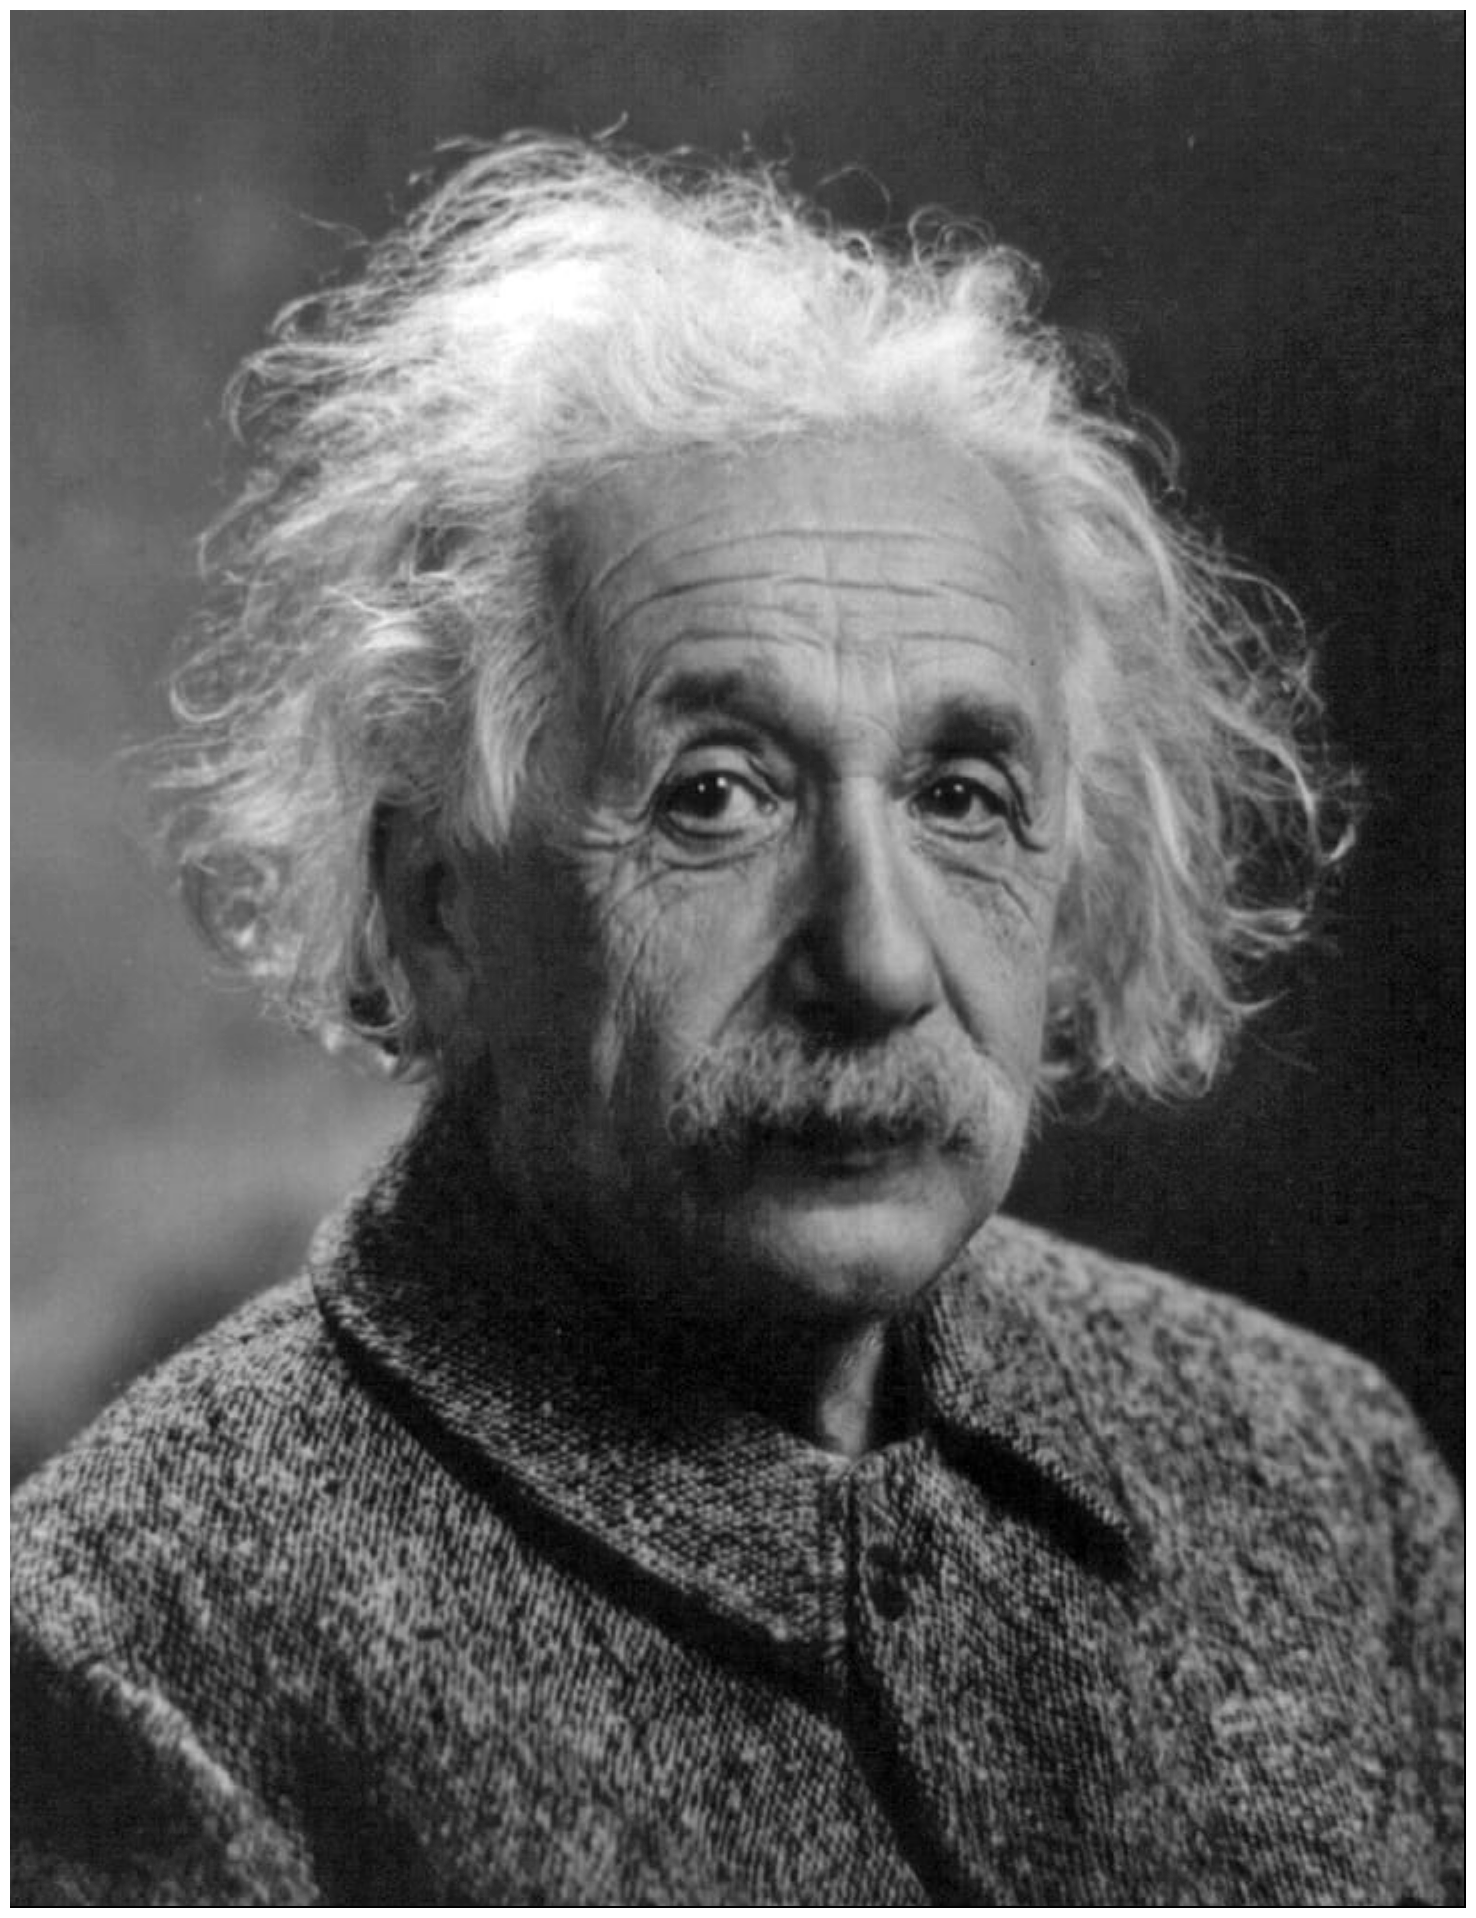

In [6]:
displayImageInActualSize(I2)

In [9]:
def f_scaleImage(S, I_gray):

    I2 = np.zeros((int(S[0][0]) * I_gray.shape[0], int(S[1][1]) * I_gray.shape[1]), dtype='uint8');
    Tinv = np.linalg.inv(S);
    for new_i in range(I2.shape[0]):
        for new_j in range(I2.shape[1]):
            P_dash = np.array([new_i, new_j]);
            P = Tinv.dot(P_dash);
            i = P[0];
            j = P[1];
            if i < 0 or i >= I_gray.shape[0] or j < 0 or j >= I_gray.shape[1]:
                pass;
            else:
                g = f_bilinearInterpolate(i, j, I_gray);
                I2[new_i, new_j] = g;
    return I2;


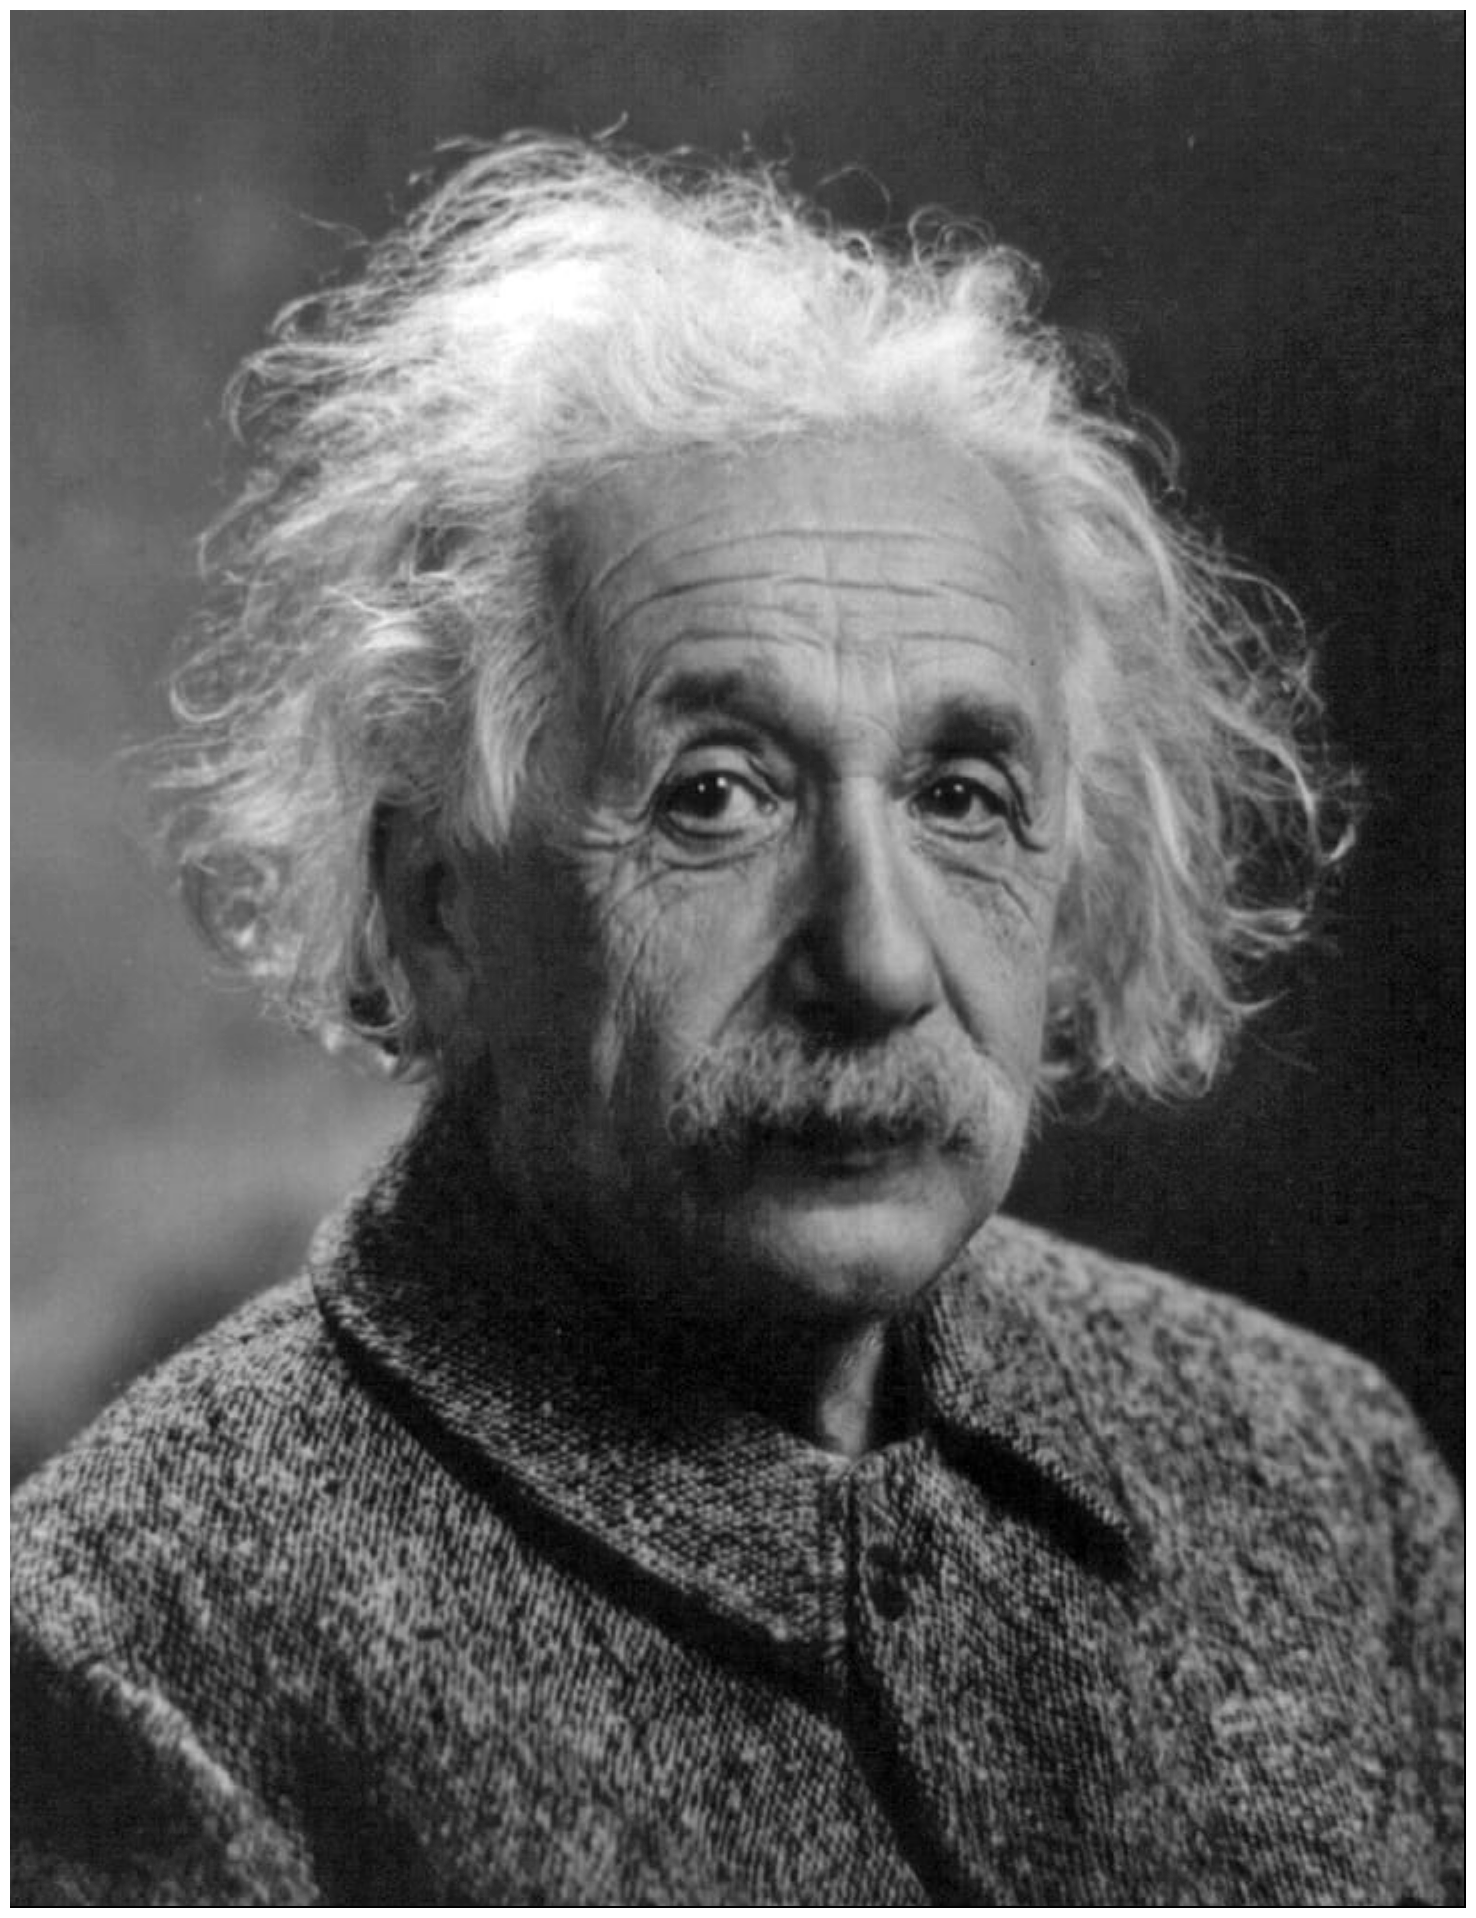

In [10]:
displayImageInActualSize(f_scaleImage([[2, 0],[0, 2]], I_gray))

In [23]:
I_RGB = I_BGR[:, :, ::-1];
S = [[2, 0],[0, 2]];
R = f_scaleImage(S, I_RGB[:, :, 0]);
G = f_scaleImage(S, I_RGB[:, :, 1]);
B = f_scaleImage(S, I_RGB[:, :, 2]);

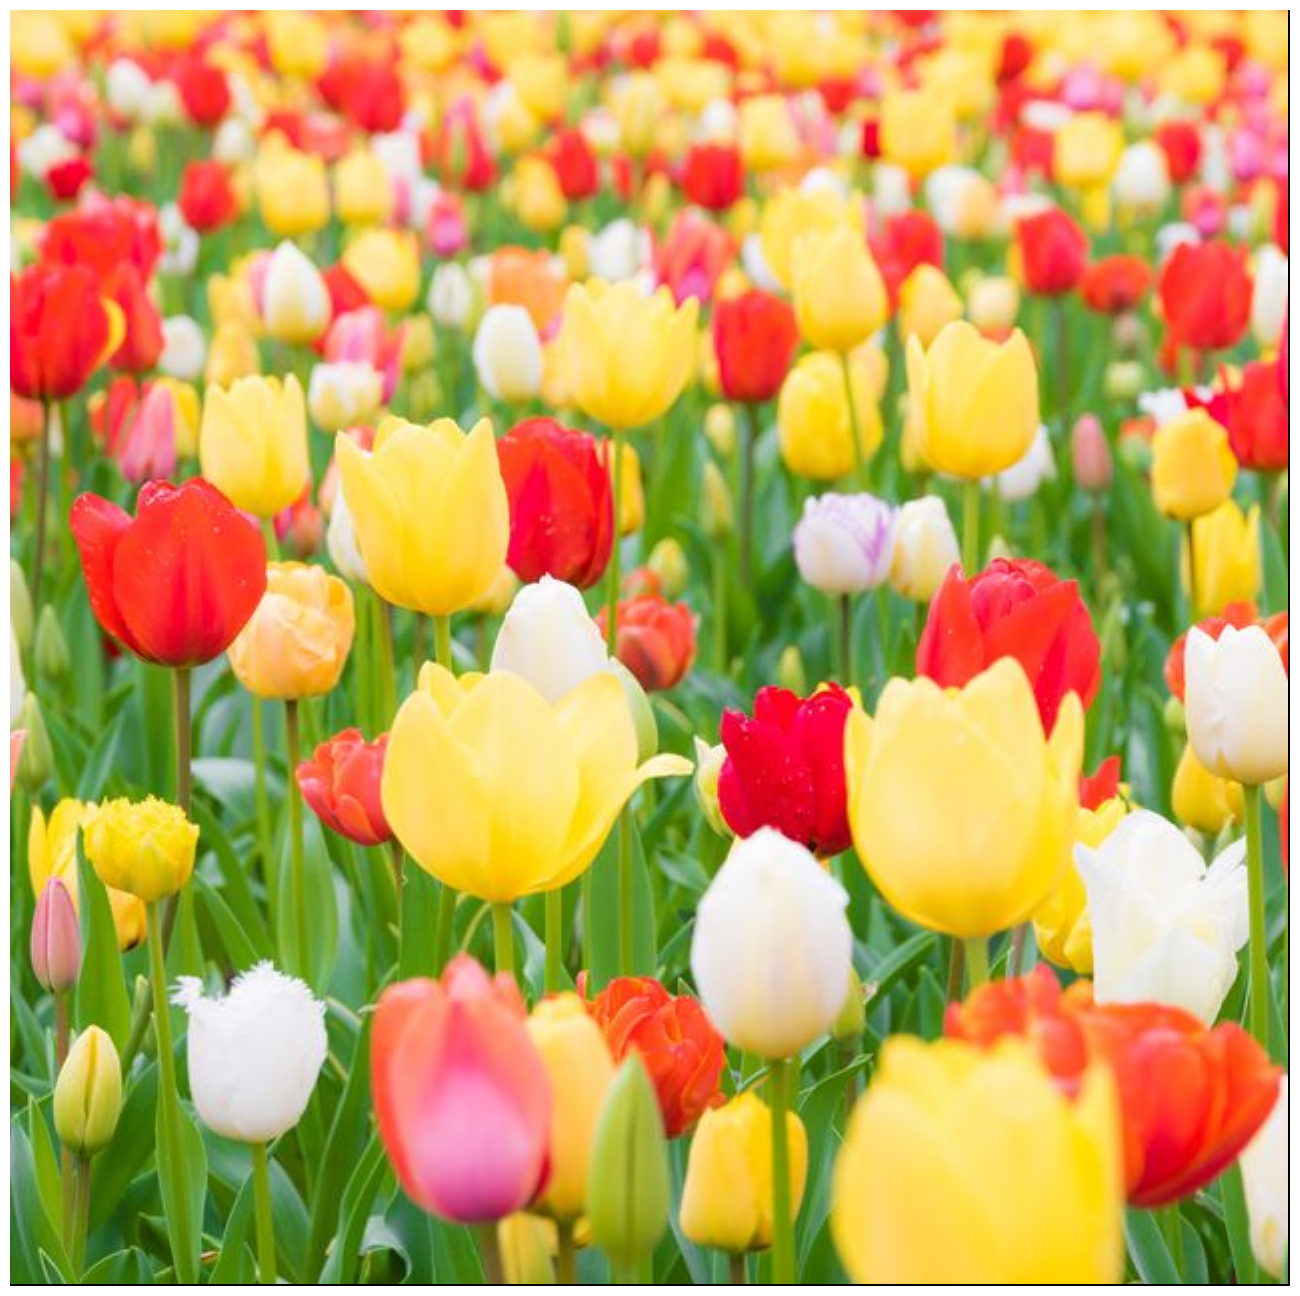

In [24]:
colorImage = np.zeros((R.shape[0], R.shape[1], 3), dtype='uint8');
colorImage[:, :, 0] = R ;
colorImage[:, :, 1] = G ;
colorImage[:, :, 2] = B ;

displayImageInActualSize(colorImage);